In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data=data.drop(['Id'],axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

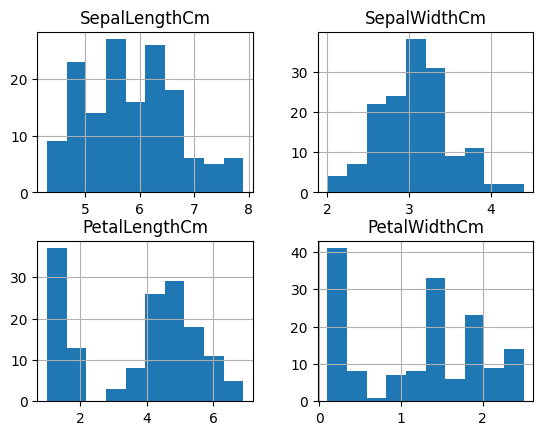

In [9]:
data.hist()

In [10]:
colors=['red','blue','green']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

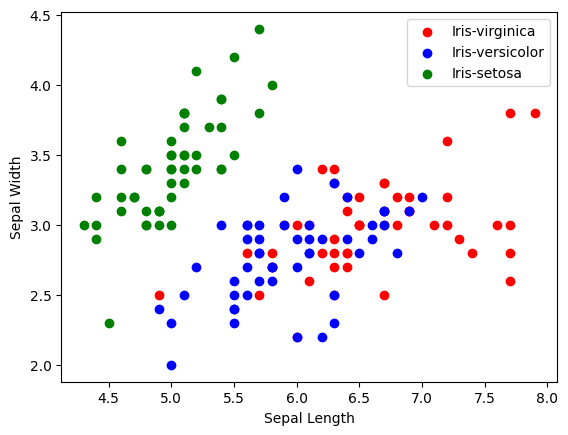

In [11]:
for i in range(3):
    x=data[data.Species==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

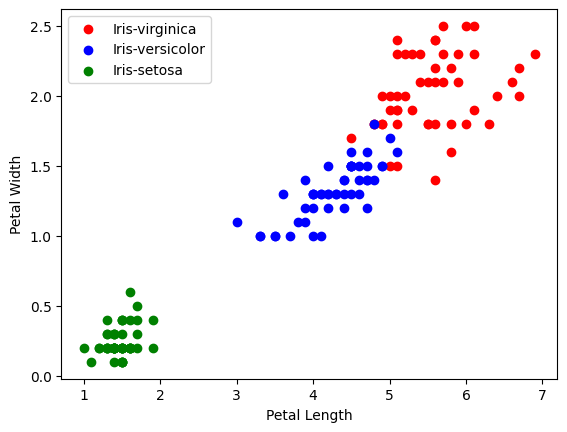

In [12]:
for i in range(3):
    x=data[data.Species==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

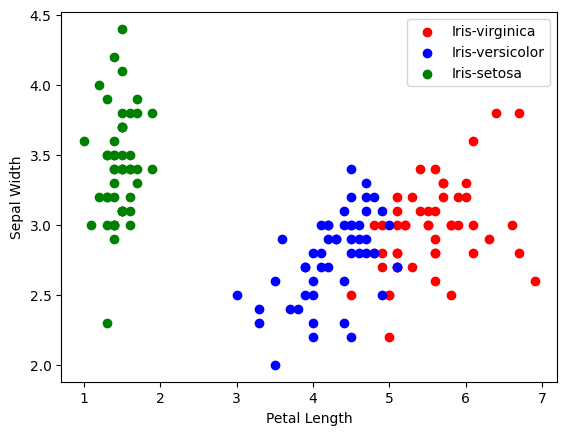

In [13]:
for i in range(3):
    x=data[data.Species==species[i]]
    plt.scatter(x['PetalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])

plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.legend()

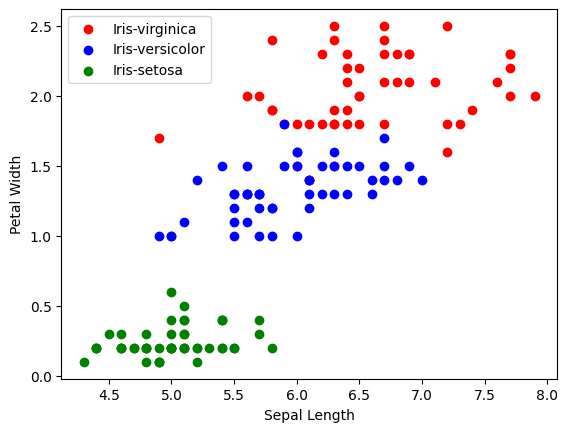

In [14]:
for i in range(3):
    x=data[data.Species==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.legend()

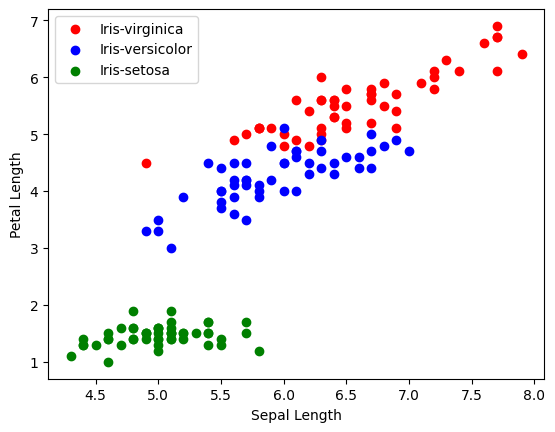

In [15]:
for i in range(3):
    x=data[data.Species==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

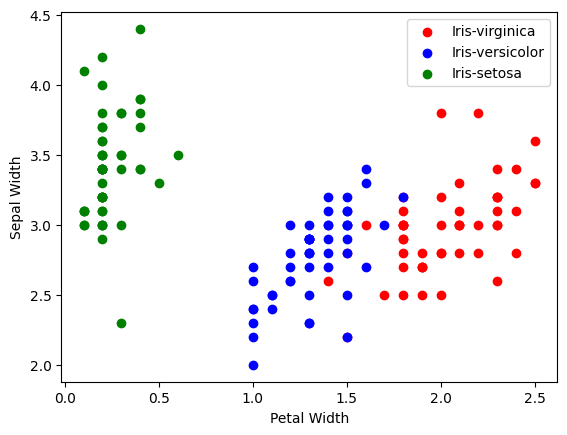

In [16]:
for i in range(3):
    x=data[data.Species==species[i]]
    plt.scatter(x['PetalWidthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])

plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.legend()

In [17]:
corr=data.drop(columns='Species').corr()

<Axes: >

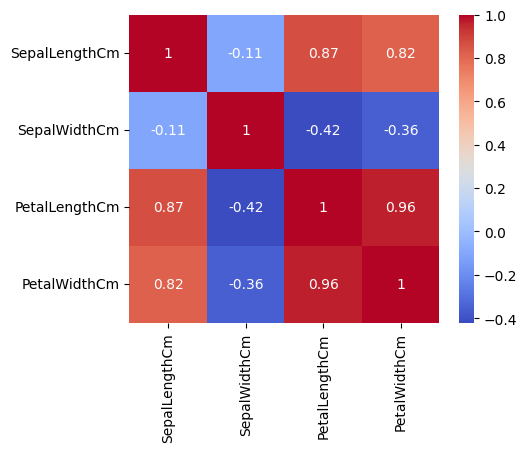

In [18]:
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

In [20]:
X=data.drop(columns='Species')
Y=data.Species

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=43)

In [22]:
model_log=LogisticRegression()

In [23]:
model_log.fit(X_train,Y_train)

LogisticRegression()

In [24]:
model_log.score(X_test,Y_test)*100

97.77777777777777

In [25]:
model_KNN=KNeighborsClassifier()
model_KNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [26]:
model_KNN.score(X_test,Y_test)*100

97.77777777777777

In [27]:
model_dec=DecisionTreeClassifier()

In [28]:
model_dec.fit(X_train,Y_train)

DecisionTreeClassifier()

In [29]:
model_dec.score(X_test,Y_test)*100

95.55555555555556

In [30]:
pickle.dump(model_log,open('IrisFlower.pkl','wb'))

In [31]:
c=pickle.load(open('IrisFlower.pkl','rb'))

In [32]:
c.predict([[6.0,2.2,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)